<a href="https://colab.research.google.com/github/alan-420/DAT8/blob/master/Neural_Nets_Pretrained_Image_Classification_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Notebook Imports

In [0]:
import numpy as np
import tensorflow as tf
import keras
from keras.preprocessing.image import img_to_array,load_img
from keras.applications.inception_resnet_v2 import InceptionResNetV2,decode_predictions , preprocess_input
from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import decode_predictions as decode_pred_vgg19,preprocess_input as preprocess_input_vgg19
from IPython.core.display import display

# Constants


In [0]:
FILE_1='01 Umbrella.jpg'
FILE_2='02 Couple.jpg'
FILE_3='03 Ocean.jpg'
FILE_4='04 Horse.jpg'
FILE_5='05 City.jpg'
FILE_6='06 Feet.jpg'



# Preprocessing Images

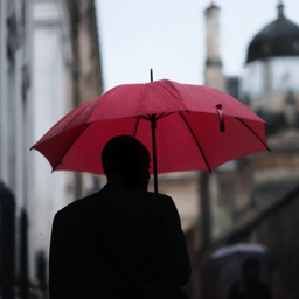

In [67]:
pic=load_img(FILE_1,target_size=(299,299))
display(pic)

In [68]:
pic_array=img_to_array(pic)
pic_array.shape

(299, 299, 3)

In [69]:
expanded=np.expand_dims(pic_array,axis=0)
expanded.shape

(1, 299, 299, 3)

In [0]:
preprocessed=preprocess_input(expanded)

In [0]:
def format_img_inceptionresnet(filename):
  pic=load_img(filename,target_size=(299,299))
  pic_arr=img_to_array(pic)
  expanded_arr=np.expand_dims(pic_arr,axis=0)
  return preprocess_input(expanded_arr)

# Load Inception Resnet

In [72]:
%%time
inception_model  =InceptionResNetV2(weights='imagenet')

CPU times: user 47 s, sys: 1.05 s, total: 48.1 s
Wall time: 47.7 s


In [0]:
# Graph are the steps taken in the whle computation process.
inception_model.graph=tf.get_default_graph()

In [74]:
predictions=inception_model.predict(preprocessed)
decode_predictions(predictions)
# here we predict the picture Umbrella correctly with Probability 0.82

[[('n04507155', 'umbrella', 0.82924354),
  ('n03792972', 'mountain_tent', 0.001226827),
  ('n04479046', 'trench_coat', 0.0011062961),
  ('n03788195', 'mosque', 0.001057237),
  ('n03220513', 'dome', 0.0010310997)]]

# `Predicting other file using the preprocess function.`
 

In [0]:
def format_img_vgg19(filename):
  pic=load_img(filename,target_size=(224,224))
  pic_arr=img_to_array(pic)
  expanded_arr=np.expand_dims(pic_arr,axis=0)
  return preprocess_input_vgg19(expanded_arr)

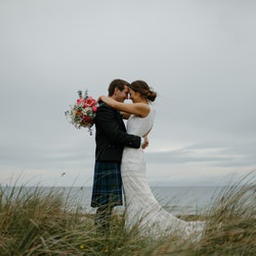

[[('n10148035', 'groom', 0.70423806),
  ('n03450230', 'gown', 0.1166958),
  ('n11879895', 'rapeseed', 0.016582685),
  ('n09421951', 'sandbar', 0.012790663),
  ('n03534580', 'hoopskirt', 0.0072878106)]]

In [76]:
data=format_img_inceptionresnet(FILE_2)
prediction=inception_model.predict(data)
display(load_img(FILE_2))
decode_predictions(prediction)

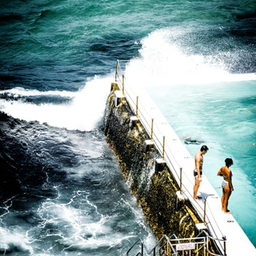

[[('n02894605', 'breakwater', 0.537085),
  ('n04347754', 'submarine', 0.12347431),
  ('n02814860', 'beacon', 0.042309213),
  ('n03662601', 'lifeboat', 0.031352382),
  ('n03160309', 'dam', 0.016830517)]]

In [77]:
data=format_img_inceptionresnet(FILE_3)
prediction=inception_model.predict(data)
display(load_img(FILE_3))
decode_predictions(prediction)

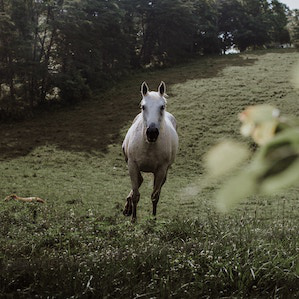

[[('n02389026', 'sorrel', 0.44831723),
  ('n02412080', 'ram', 0.029899046),
  ('n02106030', 'collie', 0.019694595),
  ('n04604644', 'worm_fence', 0.016888145),
  ('n04049303', 'rain_barrel', 0.013531369)]]

In [78]:
data=format_img_inceptionresnet(FILE_4)
prediction=inception_model.predict(data)
display(load_img(FILE_4))
decode_predictions(prediction)

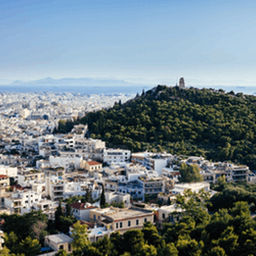

[[('n09193705', 'alp', 0.31008884),
  ('n09468604', 'valley', 0.23449756),
  ('n09332890', 'lakeside', 0.039152894),
  ('n09428293', 'seashore', 0.0356025),
  ('n09246464', 'cliff', 0.031413928)]]

In [79]:
data=format_img_inceptionresnet(FILE_5)
prediction=inception_model.predict(data)
display(load_img(FILE_5))
decode_predictions(prediction)

# Using VVG19 model


In [80]:
%%time
vvg_model=VGG19(weights='imagenet')
inception_model.graph=tf.get_default_graph()


CPU times: user 11.8 s, sys: 1.72 s, total: 13.5 s
Wall time: 12.3 s


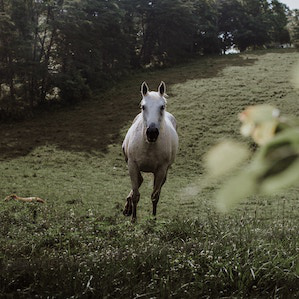

[[('n02412080', 'ram', 0.7342518),
  ('n02415577', 'bighorn', 0.1160941),
  ('n02403003', 'ox', 0.017533273),
  ('n02437616', 'llama', 0.01144305),
  ('n02091134', 'whippet', 0.00935114)]]

In [81]:
data=format_img_vgg19(FILE_4)
prediction=vvg_model.predict(data)
display(load_img(FILE_4))
decode_pred_vgg19(prediction)